<a href="https://colab.research.google.com/github/Ezraliano/Data_Science_Projects/blob/main/Project_Machine_Learning_Prediksi_obat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df =  pd.read_csv('drug200.csv')

1. Data Understanding


In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
print("data shape : ", df.shape)

data shape :  (200, 6)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.Drug.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [9]:
df.Sex.value_counts()

,count
Sex,
M,104
F,96


In [10]:
df.BP.value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


<Axes: xlabel='Age', ylabel='Count'>

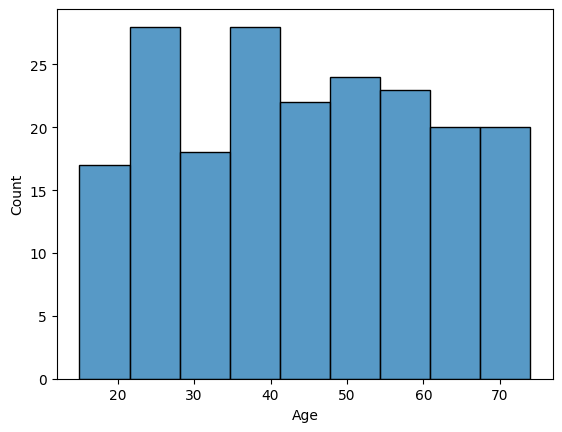

In [11]:
sns.histplot(df['Age'])

2. Data Cleaning


In [12]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [13]:
df.duplicated().sum()

0

3. Explorated Data Analysis (EDA)

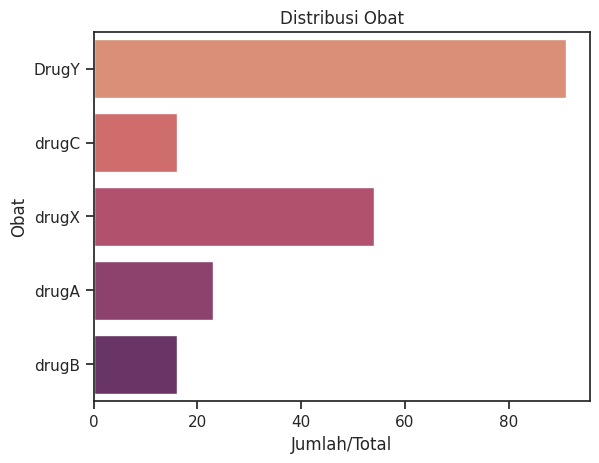

In [14]:
sns.set_theme(style='ticks')
sns.countplot(y = "Drug" , data = df , palette="flare")
plt.ylabel("Obat")
plt.xlabel("Jumlah/Total")
plt.title("Distribusi Obat")
plt.show()

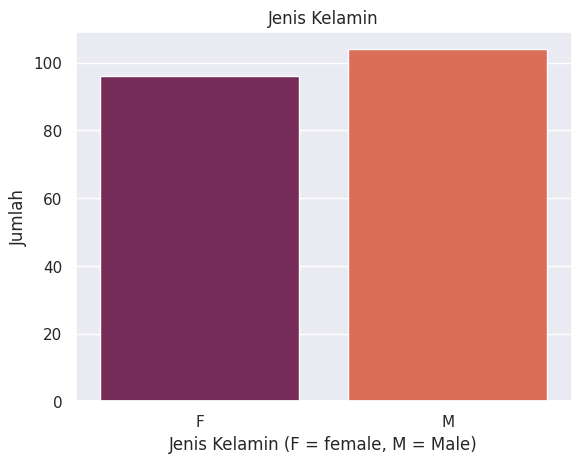

In [15]:
sns.set_theme(style='darkgrid')
sns.countplot(x = "Sex" , data = df , palette="rocket")
plt.ylabel("Jumlah")
plt.xlabel("Jenis Kelamin (F = female, M = Male)")
plt.title("Jenis Kelamin")
plt.show()

4. Data Preparation

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [17]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()
df['Sex'] = LabelEncoder.fit_transform(df['Sex'])
df['BP'] = LabelEncoder.fit_transform(df['BP'])
df['Cholesterol'] = LabelEncoder.fit_transform(df['Cholesterol'])
df['Drug'] = LabelEncoder.fit_transform(df['Drug'])


In [18]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [19]:
X = df.drop(columns =['Drug'])
y = df['Drug']
print(X.shape)
print(y.shape)

(200, 5)
(200,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 5)
(40, 5)
(160,)
(40,)


5. Modeling

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
KNN_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy: {:2f}%".format(KNN_accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
           2       0.50      0.67      0.57         3
           3       1.00      0.20      0.33         5
           4       0.73      0.73      0.73        11

    accuracy                           0.78        40
   macro avg       0.76      0.69      0.66        40
weighted avg       0.82      0.78      0.76        40

Accuracy: 77.500000%


In [23]:
testing = {
    'Age' : [23],
    'Sex' : [1],
    'BP' : [2],
    'Cholesterol' : [0],
    'Na_to_K' : [12]
}

testing = pd.DataFrame(testing)
testing

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,2,0,12


In [24]:
pred_coba = knn.predict(testing)
print('Hasil Prediksi Pasien Baru')
print(pred_coba)

Hasil Prediksi Pasien Baru
[4]
